## 1. Business Understanding

### Problem Statement
The objective of this project is to predict customer churn for SyriaTel, a telecommunications company. Customer churn has become a critical concern for most businesses as it significally impacts the revenue and growth of companies. The goal of this analysis is to be able to build a model that accurately predicts the customers that are likely to churn so that SyriaTel can take proactive measures to retain them leading to long term revenue generation and company growth. 

### Specific Objectives
 - Uncover the trends and patterns that lead to customer churn
 - Build a model that accurately predicts customers that are likely to churn
 - Determine features with most impact on predicting customer churn to inform targeted retention strategies
 - Develop practical insights that SyriaTel can use to reduce churn and retain valuable customer

### Success Metrics
 - Build a model with a high accuracy and recall score in predicting customer churn
 - Identify the most influential features that predict churn with a high degree of accuracy
 - Build a model that generalizes well on unseen data, demonstrating robustness and minimizing overfitting
 - Provide clear recommendations and actionable insights based on model results that can help SyriaTel reduce churn and improve customer retention rates

## 2. Data Understanding

In [260]:
#Data manipulation
import pandas as pd
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#### Load the Data

In [205]:
#load the data
data = pd.read_csv('SyriaTel_customer_churn.csv')
#preview rows
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [206]:
#shape of dataframe
data.shape

(3333, 21)

In [207]:
#general overview of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [208]:
#check for null values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [209]:
#general summary statistics of the dataframe
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [210]:
# Numerical Columns
print(f"Numerical Columns: {data.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {data.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


Categorical Features:

state: The state where the customer resides.

phone number: The phone number of the customer.

international plan: Whether the customer has an international plan (Yes or No).

voice mail plan: Whether the customer has a voice mail plan (Yes or No).

Numeric Features:

area code: The area code associated with the customer's phone number.

account length: The number of days the customer has been an account holder.

number vmail messages: The number of voice mail messages received by the customer.

total day minutes: The total number of minutes the customer used during the day.

total day calls: The total number of calls made by the customer during the day.

total day charge: The total charges incurred by the customer for daytime usage.

total eve minutes: The total number of minutes the customer used during the evening.

total eve calls: The total number of calls made by the customer during the evening.

total eve charge: The total charges incurred by the customer for evening usage.

total night minutes: The total number of minutes the customer used during the night.

total night calls: The total number of calls made by the customer during the night.

total night charge: The total charges incurred by the customer for nighttime usage.

total intl minutes: The total number of international minutes used by the customer.

total intl calls: The total number of international calls made by the customer.

total intl charge: The total charges incurred by the customer for international usage.

customer service calls: The number of customer service calls made by the customer.

## 3. Exploratory Data Analysis
This section involves exploring and understanding the dataset to uncover patterns, identify relationships between variables, detect outliers, and gain insights into the data before applying any modeling or statistical techniques.

### 3.1 Univariate Analysis
In this section, we'll explore each column in the dataset to see the distributions, central tendency, and spread of the feature, as well as identify any outliers or patterns present within it.

#### 3.1.1Target Variable Distribution
This will help us understand the distribution of the target variable(churn) and also understand if the data is imbalanced

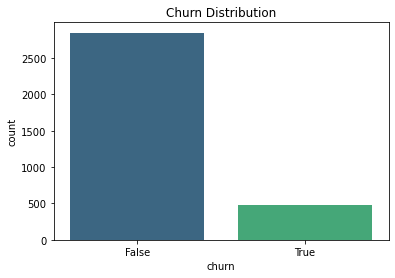

In [211]:
# Visualize Churn distribution
sns.countplot(data=data, x='churn',  palette='viridis')
plt.title('Churn Distribution')
plt.show()

In [212]:
data['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

The above visualization shows that SyriaTel retains 85.5 % of their total customers

#### 3.1.2 Customer Distribution by Area Code

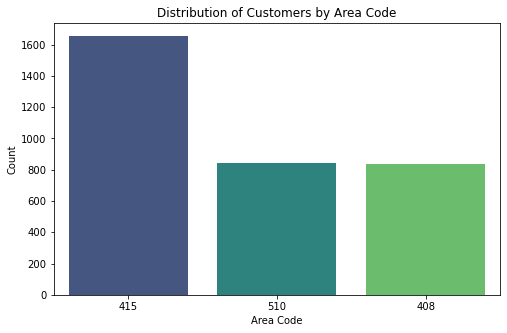

In [213]:
plt.figure(figsize=(8,5))
sns.countplot(x='area code', data=data, order=data['area code'].value_counts().index, palette='viridis')
plt.title("Distribution of Customers by Area Code")
plt.xlabel("Area Code")
plt.ylabel("Count")
plt.show()

The above visualization shows that most Syriatel customers come from Area Code 415 while the rest of the half are evenly distributed between Area code 510 and 408

#### 3.1.3 Distribution of Numerical Features


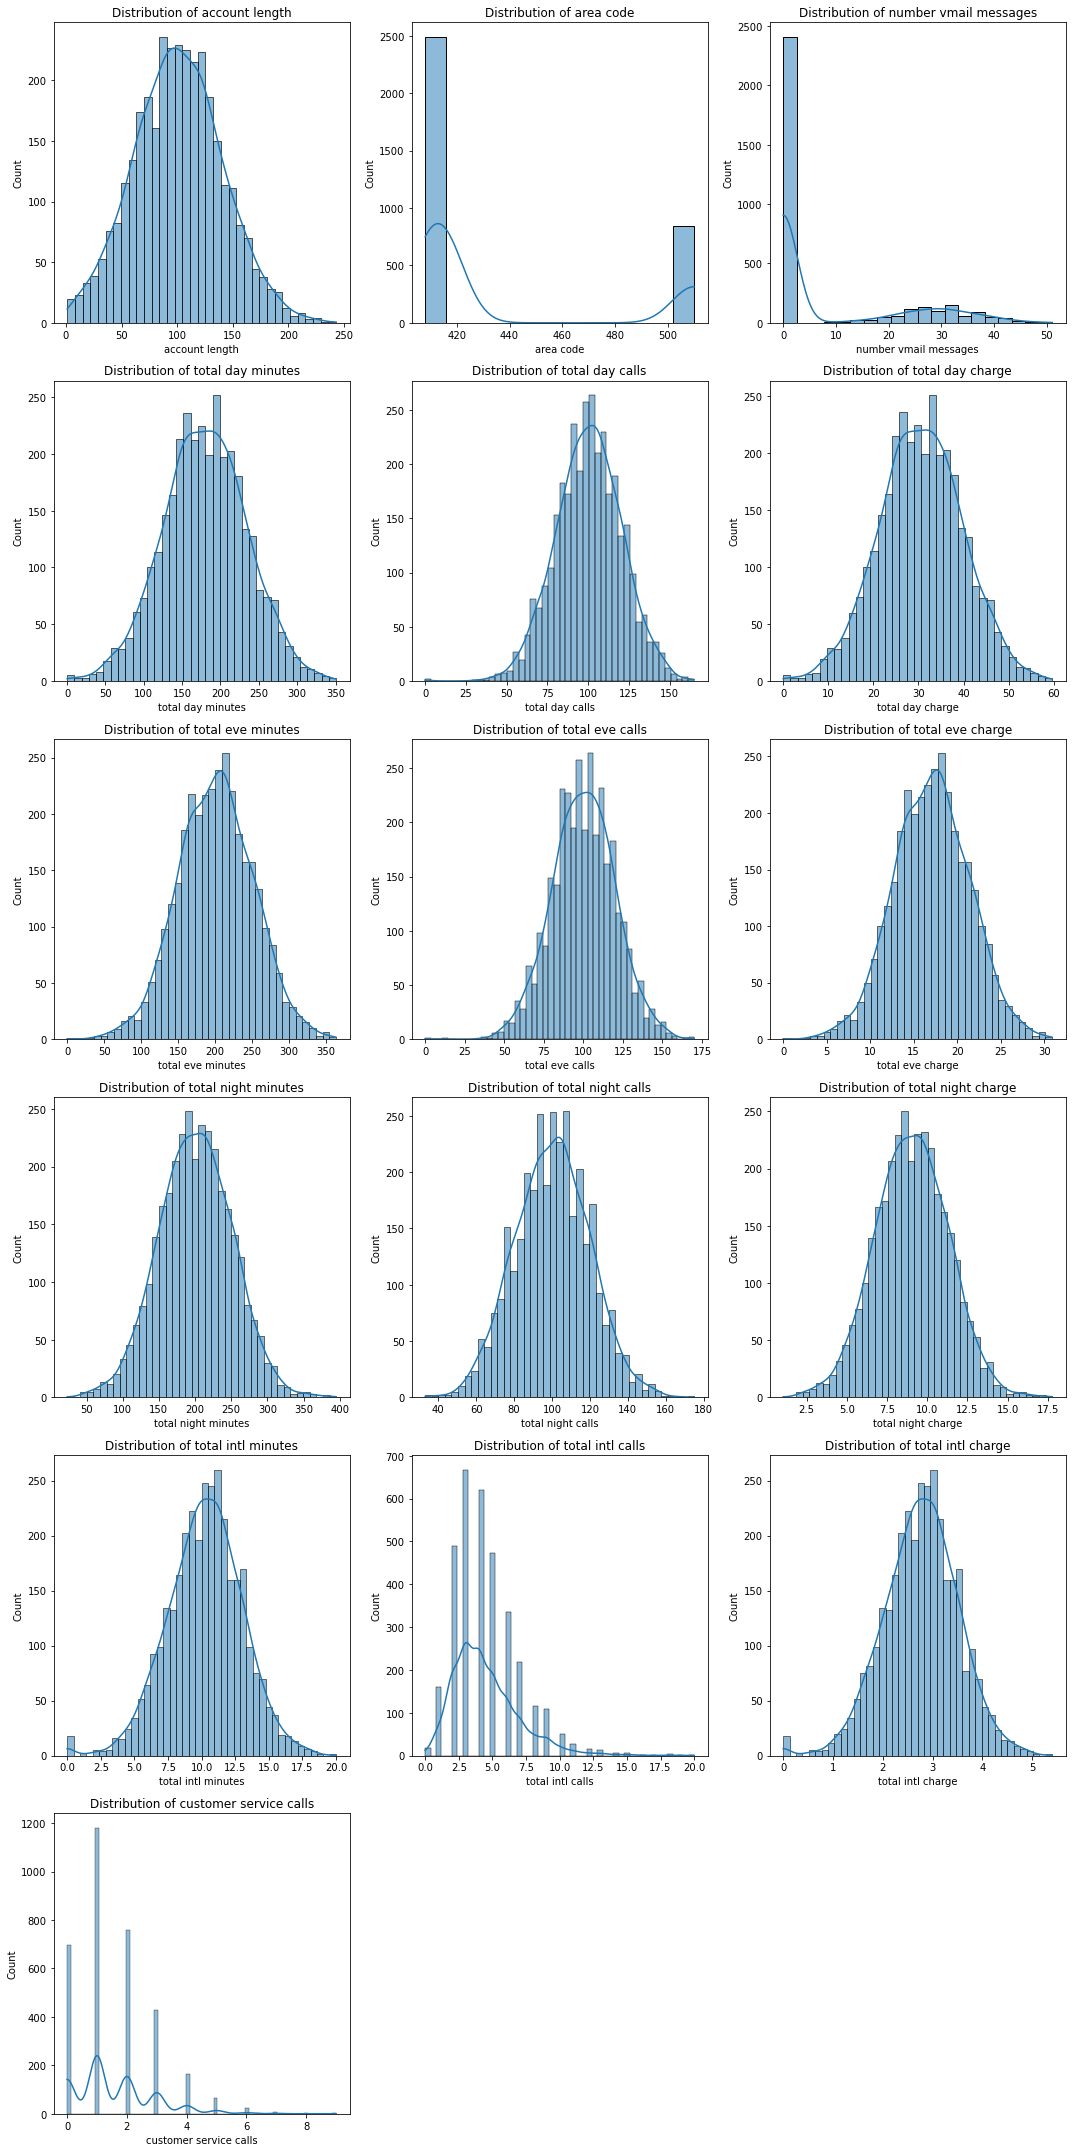

In [214]:
# Distribution of numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define number of columns and calculate required rows
ncols = 3  # Number of plots per row
nrows = -(-len(num_cols) // ncols) 

plt.figure(figsize=(15, 5 * nrows)) 

# Plot numeric features
for i, feature in enumerate(num_cols):
    plt.subplot(nrows, ncols, i + 1)  
    sns.histplot(data[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()  
plt.show()


For the distribution plots of the features above, all of them except customer service calls and number of voicemail messages have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed. Customer service calls has a few peaks, which indicates there are a few modes in the population.

#### 3.1.4 Distribution of Categorical Features
In this section we will analyze the categorical variables individually to understand their distributions. The key categorical columns in our dataset are:area code,international plan,voice mail plan,churn

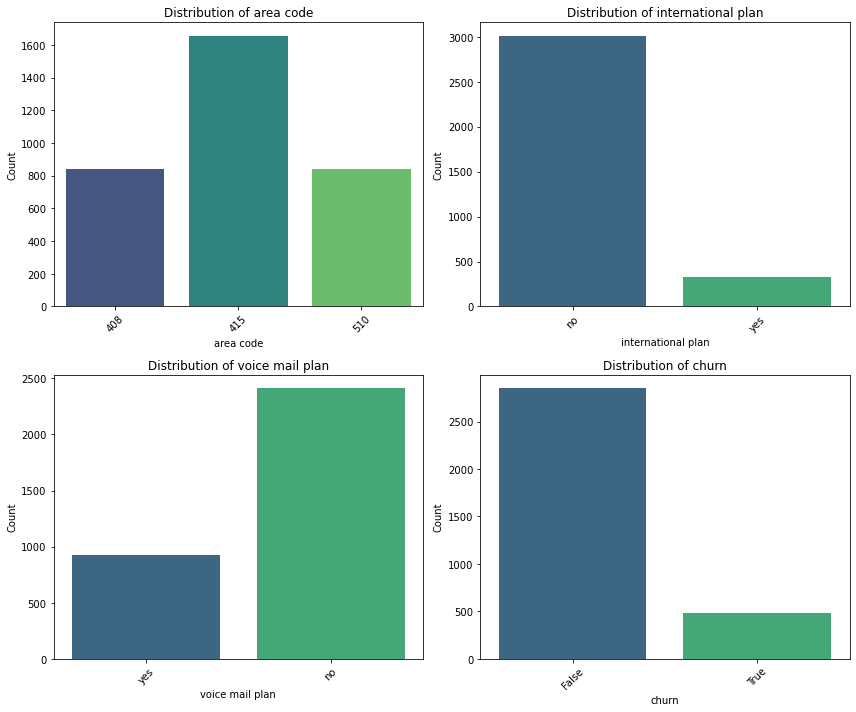

In [215]:
#Select categorical columns
cat_cols = ['area code', 'international plan', 'voice mail plan', 'churn']

#Define number of columns for layout
ncols = 2  
nrows = -(-len(cat_cols) // ncols)  

plt.figure(figsize=(12, 5 * nrows)) 

# Plot each categorical variable
for i, feature in enumerate(cat_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.countplot(x=data[feature],  palette='viridis')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

 - International plan
 
 Out of 3333, only 323 of customers have an international plan which is about 0.1%

In [216]:
data['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

 - Voicemail Plan
 
  About 38% of SyriaTel customers are subscribed to a voicemail plan

In [217]:
data['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

### 3.2 Bivariate Analysis
This helps us understand how different features interact with churn, allowing us to identify key drivers behind customer attrition

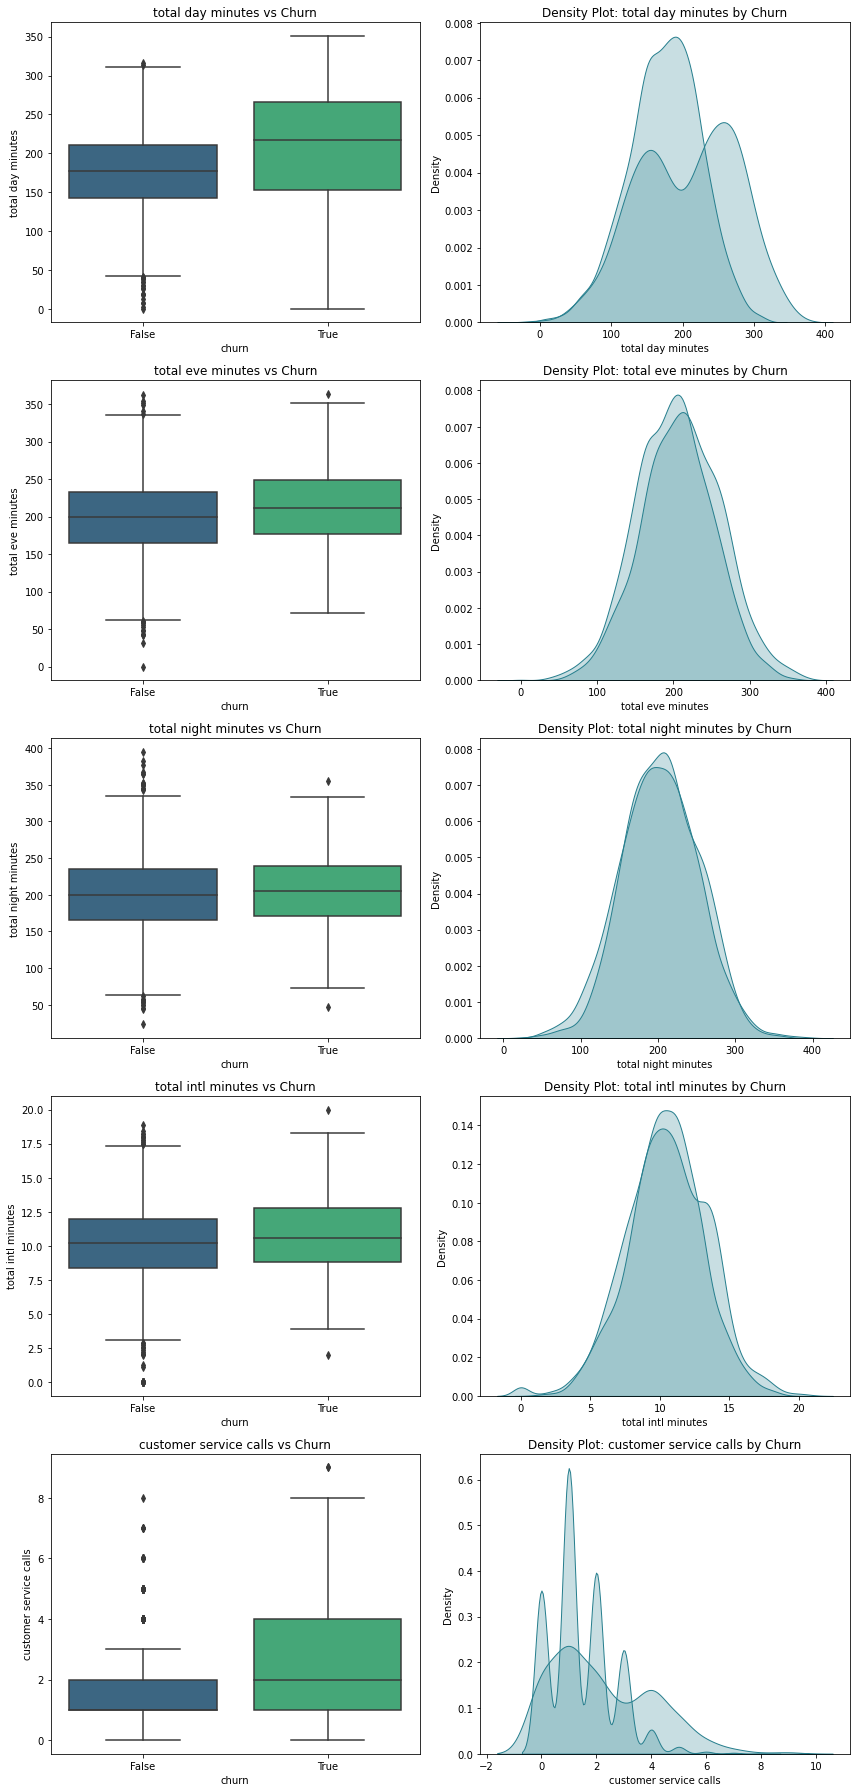

In [218]:
num_features = ['total day minutes', 'total eve minutes', 'total night minutes', 
                'total intl minutes', 'customer service calls']

plt.figure(figsize=(12, 5 * len(num_features)))

for i, feature in enumerate(num_features):
    plt.subplot(len(num_features), 2, 2*i+1)
    sns.boxplot(x=data['churn'], y=data[feature], palette='viridis')
    plt.title(f"{feature} vs Churn")

    plt.subplot(len(num_features), 2, 2*i+2)
    sns.kdeplot(data[data['churn'] == 0][feature], label="No Churn", shade=True, color=sns.color_palette("viridis")[2])
    sns.kdeplot(data[data['churn'] == 1][feature], label="Churn", shade=True, color=sns.color_palette("viridis")[2])
    plt.title(f"Density Plot: {feature} by Churn")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

#### 3.2.1 Churn Distribution by Area Code

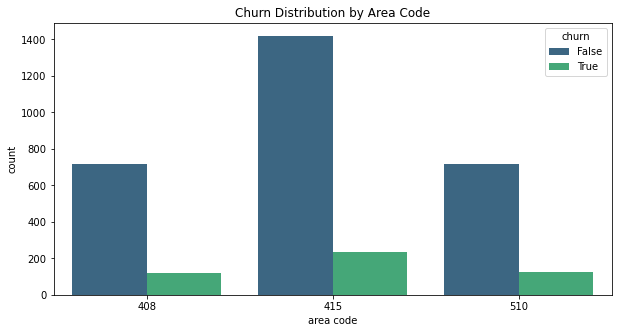

In [219]:
plt.figure(figsize=(10,5))
sns.countplot(x='area code', hue='churn', data=data, palette='viridis')
plt.title("Churn Distribution by Area Code")
plt.show()


Most customers who churned came from Area code 415

#### 3.2.2 Churn Distribution by International Plan

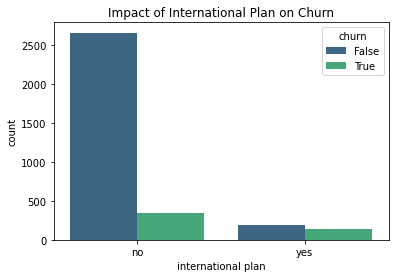

In [220]:
plt.figure(figsize=(6,4))
sns.countplot(x='international plan', hue='churn', data=data, palette='viridis')
plt.title("Impact of International Plan on Churn")
plt.show()

Most customers who churned did not have an international plan

#### 3.2.3 Churn Distribution by Voicemail plan

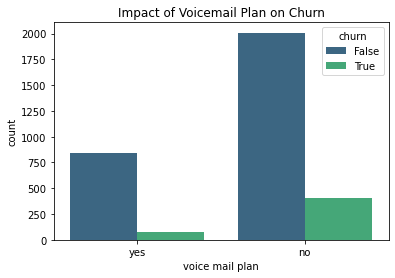

In [221]:
# Voicemail Plan vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='voice mail plan', hue='churn', data=data, palette='viridis')
plt.title("Impact of Voicemail Plan on Churn")
plt.show()

The majority of the customers who churned did not have a voicemail plan

### 3.3 Feature Correlation
Checking for features that have high correlation with the target(churn) variable

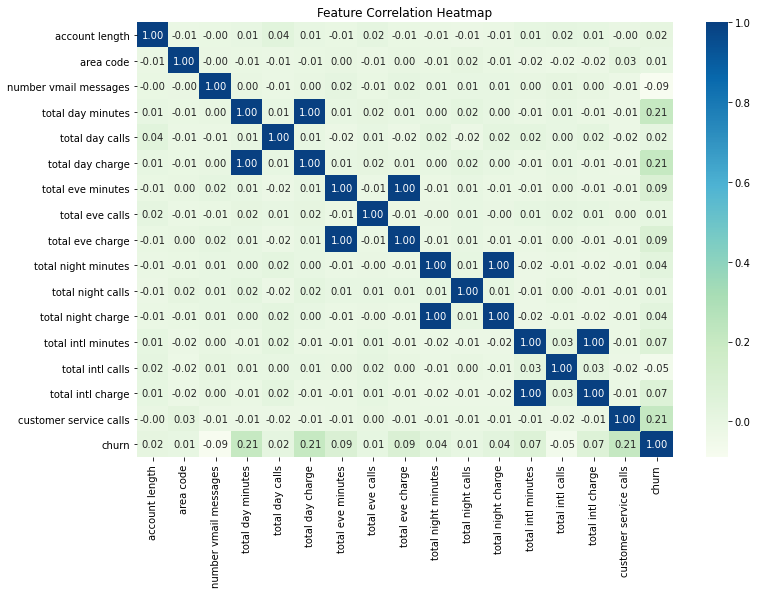

In [222]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="GnBu", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

Most of the features are not correlated however some do share a perfect correlation:

Total int charge and total int minutes features are fully positively correlated.

Total eve charge and total eve minutes features are fully positively correlated.

Total day charge and total day minutes features are fully positively correlated.

Total night charge and total night minutes features are fully positively correlated.

The perfect positive correlation between these pairs of features suggests that the charges are directly tied to the corresponding minutes

#### 3.3.1 Multicollinearity Check
To check for multicollinearity among features, the dataset was analyzed using correlation matrix,. Multicollinearity occurs when two or more features in the dataset are highly correlated with each other, which can cause issues during modeling such as instability, overfitting, or inaccurate coefficient estimates. We drop features that have a value more than 0.9.

In [223]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = data.corr().abs()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

data = data.drop(to_drop, axis=1)

## 4. Data Preprocessing
In this project, data preprocessing is crucial for preparing the dataset by encoding categorical variables, scaling features, and removing outliers to ensure the model can learn effectively and make accurate predictions

### 4.1 One Hot Encoding
In this step we transform categorical variables into numerical features for use by machine learning models. In this case we encode 'international plan' and 'voicemail plan'. We also drop the columns 'area code' and 'phone number' as they are irrelevant for modeling. Churn is transformed from boolean to integer data type

In [224]:
data = data.drop(columns=['phone number', 'area code'])

data = pd.get_dummies(data, columns=['international plan', 'voice mail plan', 'state'], drop_first=True)

data['churn'] = data['churn'].astype(int)

data

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,...,0,0,0,0,0,0,0,0,0,0
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,...,0,0,0,0,0,0,0,0,0,0
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,...,0,0,0,0,0,0,0,0,0,0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,...,0,0,0,0,0,0,0,0,0,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,77,26.55,126,18.32,83,12.56,6,2.67,...,0,0,0,0,0,0,0,0,0,0
3329,68,0,57,39.29,55,13.04,123,8.61,4,2.59,...,0,0,0,0,0,0,0,0,1,0
3330,28,0,109,30.74,58,24.55,91,8.64,6,3.81,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,105,36.35,84,13.57,137,6.26,10,1.35,...,0,0,0,0,0,0,0,0,0,0


### 4.2 Feature Engineering
In this step, we introduce new features based on existing ones in order to improve model performance

In [225]:
# Merge all call activity and charges
data['total charges'] = data['total day charge'] + data['total eve charge'] + data['total night charge'] + data['total intl charge']

data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls'] + data['total intl calls']

# Drop the original individual features as they are now combined
data.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge',
           'total day calls', 'total eve calls', 'total night calls', 'total intl calls'], axis=1, inplace=True)


data.head()


,account length,number vmail messages,customer service calls,churn,international plan_yes,voice mail plan_yes,state_AL,state_AR,state_AZ,state_CA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,total charges,total calls
0,128,25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,75.56,303
1,107,26,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,59.24,332
2,137,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,62.29,333
3,84,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,66.80,255
4,75,0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,52.09,359


### 4.3 Feature Scaling
The purpose of this is to ensure continuous features with varied ranges all make equal contributions to the model training process so as to prevent bias towards features with higher values.

In [226]:
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a StandardScaler object
scaler = MinMaxScaler()

# Apply scaling to the continuous columns
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

data.head()

,account length,number vmail messages,customer service calls,churn,international plan_yes,voice mail plan_yes,state_AL,state_AR,state_AZ,state_CA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,total charges,total calls
0,0.524793,0.490196,0.111111,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.718793,0.497778
1,0.438017,0.509804,0.111111,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.495903,0.626667
2,0.561983,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.537558,0.631111
3,0.342975,0.000000,0.222222,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.599153,0.284444
4,0.305785,0.000000,0.333333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.398252,0.746667


### 4.4 Data Splitting
It is crucial to split the data before modeling. Here we split the data into 80% for training the model, 20% for testing the model and set a random state of 42 for reproducibility purposes.

In [227]:
# Split the data into features (X) and target (y)
X = data.drop('churn', axis=1) 
y = data['churn'] 

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (2666, 57)
Testing features shape: (667, 57)
Training target shape: (2666,)
Testing target shape: (667,)


## 5. MODELING
In this phase, we will build a model that can predict the customer churn based on the features in our dataset. The model will be evaluated on the recall score. Specifically, if it achieves an recall score of 80% or higher, it will be considered a success.

In order to achieve the targets stipulated in the project proposal, we will be using the following algorithms:

Logistic Regression
Decision Tree
Random Forest
XG Boost

### 5.1 Logistic Regression
We use this as our baseline model

In [228]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log_reg)}\n")

Logistic Regression Model:
Accuracy: 0.8515742128935532
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.53      0.16      0.24       101

    accuracy                           0.85       667
   macro avg       0.70      0.57      0.58       667
weighted avg       0.82      0.85      0.82       667




An accuracy score of 0.85 indicates that the model correctly predicts churning 85.6% of the time. However a low F1 score of 0.25 indicates that the model is highly biased towards class 0(non churners) due to class imbalance.

### Class Weighting
We apply class weights to the Logistic Regression model to address the class imbalance in the dataset. The primary objective is to give more importance to the minority class (churners) to improve the model's ability to predict them

In [232]:
 # Logistic Regression with class weights
log_reg_weighted = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
log_reg_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = log_reg_weighted.predict(X_test)

# Evaluate the model
print("Logistic Regression with Class Weights:")
print(f"Accuracy: {log_reg_weighted.score(X_test, y_test):.4f}")

Logistic Regression with Class Weights:
Accuracy: 0.7871


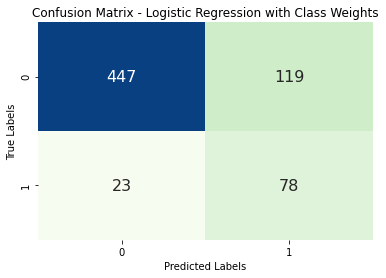

In [236]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_weighted)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='GnBu', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix - Logistic Regression with Class Weights")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [237]:
print(classification_report(y_test, y_pred_weighted))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.40      0.77      0.52       101

    accuracy                           0.79       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.79      0.81       667



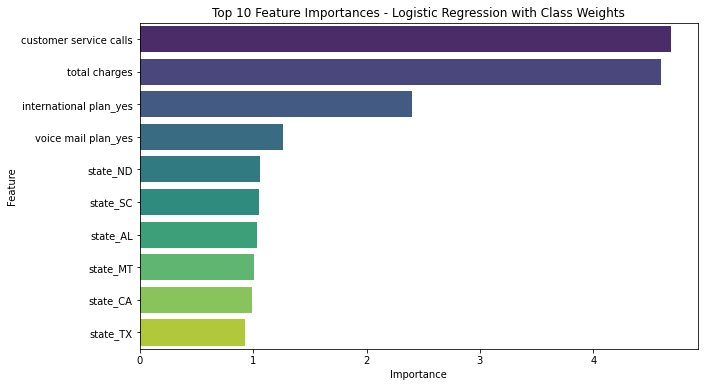

In [239]:
# Get the absolute value of the coefficients 
feature_importances = np.abs(log_reg_weighted.coef_[0])

# Create a df for easy interpretation
feature_names = X_train.columns 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#  top 10 features
top_10_importance_df = importance_df.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importance_df, palette='viridis')
plt.title("Top 10 Feature Importances - Logistic Regression with Class Weights")
plt.show()

The F1-score and Recall for churners increased to 0.52 and 0.77 indicating that the model is now much better at detecting and predecting the minority class(churners).

The confusion matrix evaluation shows that the model had a higher number of true positives and true negatives than false positives and false negatives indicating that the model is making more correct predictions than incorrect ones and is not overfitting.

The top 3 most important features according to the model are: customer service calls,toal charges and international plan

### 5.2 Decision Tree Model
Decision tree is a machine learning algorithm that splits data into branches based on feature values to make predictions. It’s relevant for this project as it helps model complex, non-linear relationships between features and customer churn, providing easily interpretable decision rules for understanding why customers may leave.

In [240]:
# Initialize Decision Tree model with class weight to handle imbalanced data
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Evaluate the model
dt_acc = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)

# Print results
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_acc}")
print(dt_report)

Decision Tree Classifier:
Accuracy: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.70      0.73      0.72       101

    accuracy                           0.91       667
   macro avg       0.83      0.84      0.83       667
weighted avg       0.91      0.91      0.91       667



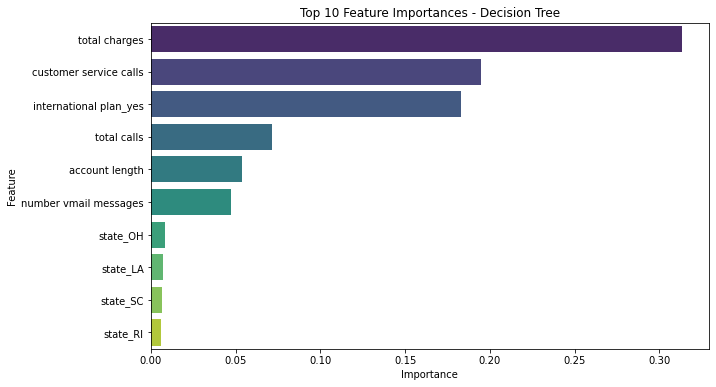

In [252]:
# Get the feature importances
feature_importances = dt_model.feature_importances_

# Create a df for easy interpretation
feature_names = X_train.columns 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances})

# Sort the features by importance and select the top 10
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Top 10 Feature Importances - Decision Tree")
plt.show()

The decision tree model has a recall score of 0.73, which is good but does not perform not better than the baseline model. This means that the model can identify around 73% of the actual positive instances correctly.


According to the model, total charges, customer servive calls, international plan are the top three most important features.

### 5.3 Random Forest Classifier
Random Forest Classifier in this project has been used due to its ability to model complex, non-linear relationships and handle large datasets with higher accuracy. It also provides feature importance values, which can help in identifying the most influential features in predicting customer churn. Additionally, its ensemble nature reduces overfitting compared to individual decision trees

In [253]:
# Initialize Random Forest model with class weight to handle imbalanced data
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_acc = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# Print results
print("Random Forest Classifier:")
print(f"Accuracy: {rf_acc}")
print(rf_report)

Random Forest Classifier:
Accuracy: 0.9490254872563718
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.96      0.69      0.80       101

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



The random forest classifier model has a recall score of 0.69, which is poor compared to the previous model. This means that the model can identify around 69% of the actual positive instances correctly.

### 5.4 XGBoost
XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that uses an ensemble technique called gradient boosting. It builds multiple decision trees sequentially, with each tree correcting the errors of the previous one.

In [257]:
# Calculate the positive class weight to handle class imbalance
positive_class_weight = (len(y_train) - sum(y_train)) / sum(y_train)

# Initialize XGBoost model with class weight to handle imbalanced data
xgb_model = xgb.XGBClassifier(scale_pos_weight=positive_class_weight, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)

# Print results
print("XGBoost Classifier with Class Weights:")
print(f"Accuracy: {xgb_acc}")
print(xgb_report)

XGBoost Classifier with Class Weights:
Accuracy: 0.9310344827586207
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       566
           1       0.82      0.69      0.75       101

    accuracy                           0.93       667
   macro avg       0.89      0.83      0.86       667
weighted avg       0.93      0.93      0.93       667



The XGBoost classifier model has a recall score of 0.69. This means that the model can identify around 69% of the actual positive instances correctly.

## 6. Model Evaluation
In this phase, we'll evaluate models based on recall score and ROC_AUC.

### 6.1 Model Comparison with Recall Score
The recall score is a measure of how many of the positive instances the model correctly identifies. A higher recall score indicates that the model is better at identifying positive instances.

In [258]:
np.random.seed(123)

# Define the classifiers
classifiers = [LogisticRegression(class_weight='balanced', random_state=42),
               RandomForestClassifier(class_weight='balanced', random_state=42),
               DecisionTreeClassifier(class_weight='balanced', random_state=42),
               xgb.XGBClassifier(scale_pos_weight=1, random_state=42)] 
# Create a result table
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and store recall scores
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set the classifier names as the index labels
result_table.set_index('classifiers', inplace=True)

# Display the result table
print(result_table)

                          recall
classifiers                     
LogisticRegression      0.772277
RandomForestClassifier  0.693069
DecisionTreeClassifier  0.732673
XGBClassifier           0.693069


The results table shows that the LogisticRegression has the highest recall score, followed by DecisionTreeClassifier then RandomForestClassifier and XGBClassiefier.

### 6.2 Model Comparison with ROC Curve

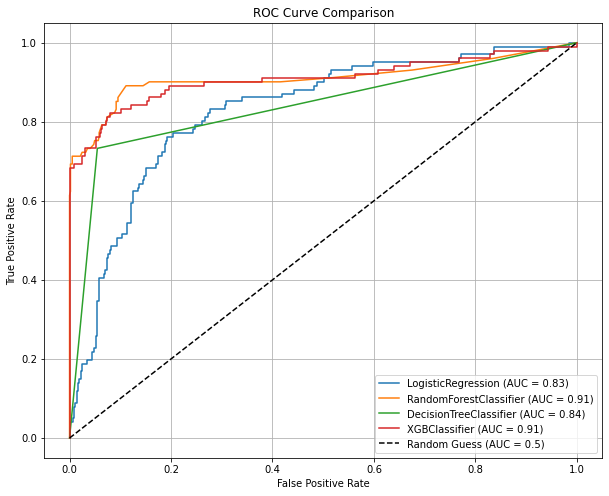

In [261]:
np.random.seed(123)

# Define the classifiers
classifiers = [LogisticRegression(class_weight='balanced', random_state=42),
               RandomForestClassifier(class_weight='balanced', random_state=42),
               DecisionTreeClassifier(class_weight='balanced', random_state=42),
               xgb.XGBClassifier(scale_pos_weight=1, random_state=42)]  
# Set up the plot
plt.figure(figsize=(10, 8))

# Train the models and plot ROC curve
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr) 
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{cls.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()

The ROC curve analysis shows that the RandomForestClassifier and XGBClassifier have the best performance with auc score of 0.91, followed by the  DecisionTreeClassifier and LogisticRegression at 0.83. 

A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances

### 6.3 Model Tuning
In this case we shall be tuning Decision tree model and Random Forest to further improve their performance. We shall use Gridsearch to perform model tuning

#### 6.3.1 Tuning Decision Tree

In [264]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy for Decision Tree:", grid_search_dt.best_score_)

# Make predictions with the best model
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy for Decision Tree on Test Set:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy for Decision Tree: 0.9441125422490181
Accuracy for Decision Tree on Test Set: 0.9490254872563718
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.95      0.70      0.81       101

    accuracy                           0.95       667
   macro avg       0.95      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



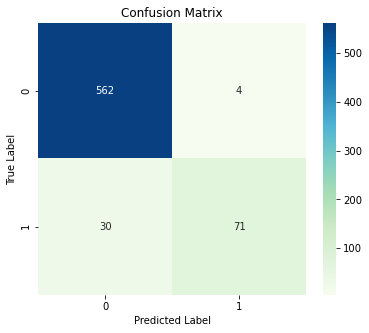

In [272]:
cm = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

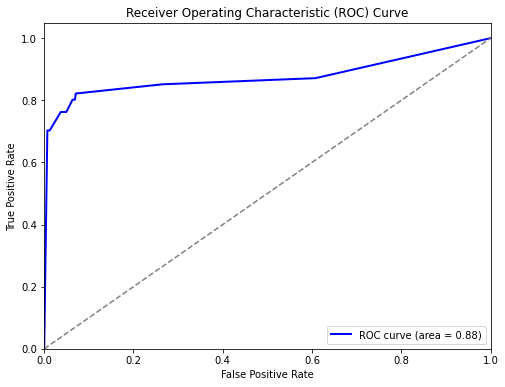

In [273]:
# Predict probabilities for ROC Curve
y_probs_dt = best_dt_model.predict_proba(X_test)[:, 1] 

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 6.3.2 Tuning Random Forest Classifier

In [269]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)

# Make predictions with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
print("Accuracy for Random Forest on Test Set:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Best Parameters for Random Forest: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy for Random Forest: 0.9489877802840259
Accuracy for Random Forest on Test Set: 0.9490254872563718
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.94      0.71      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



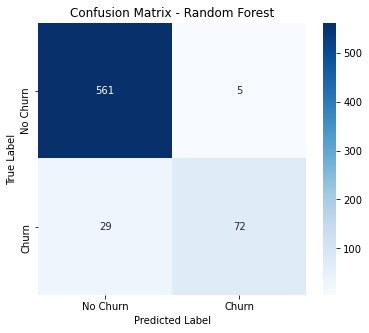

In [274]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

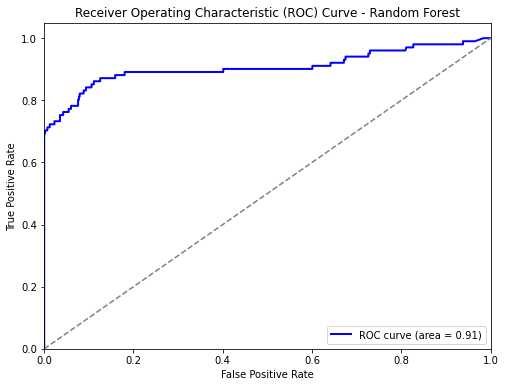

In [275]:
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1] 

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

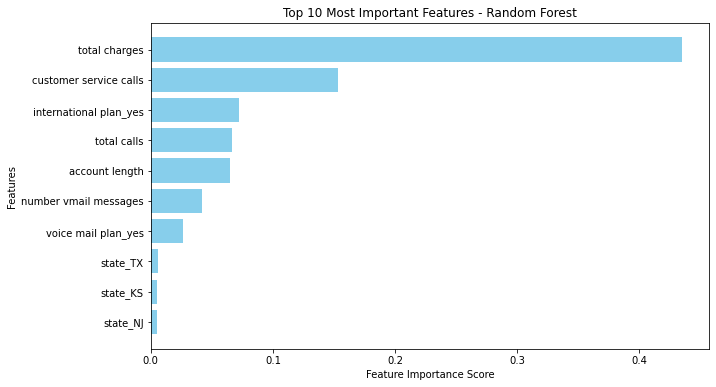

                   Feature  Importance
55           total charges    0.435231
2   customer service calls    0.153452
3   international plan_yes    0.072623
56             total calls    0.066813
0           account length    0.064967
1    number vmail messages    0.042075
4      voice mail plan_yes    0.026272
47                state_TX    0.006146
20                state_KS    0.004988
35                state_NJ    0.004929


In [276]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importance_df.head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features - Random Forest')
plt.gca().invert_yaxis() 
plt.show()

# Print top 10 features
print(top_10_features)

### 7. Conclusion
1. The recall for RandomForest improves to 0.71, while this is an acceptable score, with more feature engineering techniques, it would be possible to improve the performance of this particulr model.The model therefore does a fairly good job at predicting the churn rate at SyriaTel.

2. However, the recall for Decision Tree drops. This could be due to a number of factors. All the same , the model does a fairly good job at predicting the churn rate at SyriaTel company.

###   Recommendations

 - Targeted Promotions and Discounts: Use the model to identify customer segments at risk of churning and offer them targeted discounts, loyalty programs, or bundled packages that address their specific needs and usage patterns. For example customers from area 415
 - Improved Plan Pricing Strategies: The company should consider providing better prices for international and voicemail plans as most customers who churned had not subscribed to either of the plans 
 - Significant Features Enhancement: SyriaTel should focus on enhancing the features identified as significant in predicting the churn so as to increase customer retention ie call charges 
 - Customer Retention Strategies: The company should focus retention strategies in states where there was a high churn rate